## Maximize Crop Yield Using AI

### Team:
####  Ashna Kunnathully Prasannan (C0786430)
####  Jibin John (C0796674)
####  Nirmal Dilip Kumar (C0792140)



In [1]:
#Importing libraries 
import pandas as pd
import os, os.path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from pandas_profiling import ProfileReport
#importing all the required ML packages
from sklearn.linear_model import LinearRegression #linear regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

## Dataset links 

### https://github.com/Ankit-jailwal/Maati-AI-Based-Crop-recommendation-App-/tree/main/Datasets
### https://github.com/shan515/AI-Based_Crop-Predictor_App/tree/main/dataset
### https://www.kaggle.com/emmarex/plantdisease  
### https://www.kaggle.com/vbookshelf/rice-leaf-diseases 


## The below dataset is for crop recommendation 

In [191]:
# Dataset 1 for Crop recommendation 

crop_data1 = pd.read_csv('crops_final.csv')

In [192]:
# Checking the records (shape) of the data
crop_data1.shape

(121081, 15)

In [193]:
crop_data1.head()

State_Name  District_Name  Crop_Year  Season     Area  Production  \
0  Andhra Pradesh      ANANTAPUR       1997  Kharif  21400.0      2600.0   
1  Andhra Pradesh       CHITTOOR       1997  Kharif   6100.0       900.0   
2  Andhra Pradesh  EAST GODAVARI       1997  Kharif   1600.0       300.0   
3  Andhra Pradesh         GUNTUR       1997  Kharif  28400.0     14900.0   
4  Andhra Pradesh         KADAPA       1997  Kharif   5700.0      1400.0   

   Temperature        PH   Rainfall  Sowing Temp  Harvest Temp  Phosphorous  \
0    33.259371  7.030931  60.840858    32.784967     37.270328    15.602418   
1    33.324233  6.562556  64.758946    29.302448     36.956692    16.013498   
2    33.736284  6.557421  61.573425    29.146480     36.275074    16.430769   
3    32.341533  6.821730  63.761790    25.673411     38.106889    15.978828   
4    32.777780  7.151006  61.350980    29.779704     38.117548    17.742642   

   Nitrogen     Potash       crop  
0  6.722272  10.120769  arhar/tur  
1  6.084758  11.472384  arhar/tur  
2  5.703082  11.680659  arhar/tur  
3  6.178624  10.308787  arhar/tur  
4  7.166940  11.256358  arhar/tur

In [194]:
# Checking the count of each crop available in the dataset

crop_data1.crop.value_counts()

wheat                    7520
maize-k                  7320
gram                     7074
rapeseed &mustard        6978
rice                     6878
arhar/tur                6798
sugarcane                6297
urad                     5947
moong(green gram)        5577
groundnut                5359
bajra                    4672
linseed                  4335
potato                   4165
dry chillies             4104
masoor                   4096
barley                   4017
onion                    3985
cotton(lint)             3974
peas & beans (pulses)    3965
turmeric                 3676
coriander                2830
maize-r                  2735
sunflower                2577
ragi                     2448
jowar                    1592
safflower                1301
garlic                    544
cowpea(lobia)             241
ginger                     76
Name: crop, dtype: int64

In [195]:
# Replacing the local names with globally used name for certain crops in the dataset

crop_data1 = crop_data1.replace({'arhar/tur': 'Arhar', 'cotton(lint)': 'Cotton','dry chillies':'Chillies','gram':'Peas','linseed':'Flax','maize-k':'Maize','maize-r':'Maize',
'cowpea(lobia)':'Cowpea','peas & beans (pulses)':'Pulses'})

In [196]:
# Converting the first letter of each crop to caps
crop_data1['crop'] = crop_data1['crop'].str.capitalize()

In [197]:
# Filtering the dataset for certain attributes
crop_data1 = crop_data1[['Temperature','PH','Rainfall','Phosphorous','Nitrogen','Potash','crop']]
crop_data1

Temperature        PH   Rainfall  Phosphorous   Nitrogen     Potash  \
0         33.259371  7.030931  60.840858    15.602418   6.722272  10.120769   
1         33.324233  6.562556  64.758946    16.013498   6.084758  11.472384   
2         33.736284  6.557421  61.573425    16.430769   5.703082  11.680659   
3         32.341533  6.821730  63.761790    15.978828   6.178624  10.308787   
4         32.777780  7.151006  61.350980    17.742642   7.166940  11.256358   
...             ...       ...        ...          ...        ...        ...   
121076    15.566117  7.693354  58.073681     4.564863   8.180757   0.000000   
121077    25.391389  6.101766  62.610572    49.117328  22.066996  12.035480   
121078    25.881600  6.181125  30.692217    53.876553  23.047927  12.743419   
121079    24.774702  6.929148  58.606499    47.295222  24.395453  11.042995   
121080    23.613468  6.643719  53.631079    54.345860  26.842375  13.102743   

         crop  
0       Arhar  
1       Arhar  
2       Arhar  
3       Arhar  
4       Arhar  
...       ...  
121076   Urad  
121077  Wheat  
121078  Wheat  
121079  Wheat  
121080  Wheat  

[121081 rows x 7 columns]

In [198]:
# Calling the second dataset for crop recommendation 

# this dataset contains certain attributes such as Demand of crop, fertilizers required etc.

crop_data2 = pd.read_csv('prediction.csv')

In [199]:
crop_data2.head()

Crops                     Fertilisers required  \
0      Paddy IGKVR-2 (IET 19795)                           Potassium,Urea   
1  Paddy CR Dhan 501 (IET 19189)                           Potassium,Urea   
2    Wheat VL Gehun 907 (VL 907)                      Phosphorus,Nitrogen   
3                  Wheat WHD 943                      Phosphorus,Nitrogen   
4      Millet Nandi-65 (MH-1549)  Nitrogen,Magnesium,Potassium,Phosphorus   

  Cost of cultivation Expected revenues Quantity of seeds per hectare  \
0               22810        63851.8391                          25kg   
1               22810        63851.8391                          25kg   
2               17714          50166.54                         112kg   
3               17714          50166.54                         112kg   
4               21570       59556.38316                           5kg   

  Duration of cultivation Demand of crop            Crops for mixed cropping  
0                 105-123           High                     Gram, Groundnut  
1                 105-126           High                     Gram, Groundnut  
2                  60-154           High     Horse Gram, Black Gram, Mustard  
3                  60-157           High     Horse Gram, Black Gram, Mustard  
4                   65-70       Moderate  Black gram, Moong, Cowpea, Sorghum

In [200]:
# Replacing specific category to common name for potato
crop_data2 = crop_data2.replace({'Sweet potato': 'Potato'})

In [201]:
# Removing the codes/technical feature from the name of the crops

crop_data2['Crops'] = crop_data2['Crops'].str.split(' ').str[0]


In [202]:
# Changing the column name to match with other dataset for merging

crop_data2 = crop_data2.rename(columns ={"Crops":"crop"} )

In [203]:
# Filtering the dataset with required attributes
crop_data2 = crop_data2[['crop','Fertilisers required','Demand of crop','Crops for mixed cropping']]

In [204]:
#Sorting the values 
crop_data2.sort_values("crop", inplace = True) 
  
#dropping ALL duplicte values 
crop_data2.drop_duplicates(subset ="crop", 
                     keep = 'first' , inplace = True)

In [205]:
crop_data2.shape

(48, 4)

### The two datasets are merged into a single dataset for crop recommendation 

In [206]:
crop_data = pd.merge(crop_data1, crop_data2, how ='left', on=['crop'])

In [207]:
crop_data

Temperature        PH   Rainfall  Phosphorous   Nitrogen     Potash  \
0         33.259371  7.030931  60.840858    15.602418   6.722272  10.120769   
1         33.324233  6.562556  64.758946    16.013498   6.084758  11.472384   
2         33.736284  6.557421  61.573425    16.430769   5.703082  11.680659   
3         32.341533  6.821730  63.761790    15.978828   6.178624  10.308787   
4         32.777780  7.151006  61.350980    17.742642   7.166940  11.256358   
...             ...       ...        ...          ...        ...        ...   
121076    15.566117  7.693354  58.073681     4.564863   8.180757   0.000000   
121077    25.391389  6.101766  62.610572    49.117328  22.066996  12.035480   
121078    25.881600  6.181125  30.692217    53.876553  23.047927  12.743419   
121079    24.774702  6.929148  58.606499    47.295222  24.395453  11.042995   
121080    23.613468  6.643719  53.631079    54.345860  26.842375  13.102743   

         crop Fertilisers required Demand of crop  \
0       Arhar        NPK,Rhizobium       Moderate   
1       Arhar        NPK,Rhizobium       Moderate   
2       Arhar        NPK,Rhizobium       Moderate   
3       Arhar        NPK,Rhizobium       Moderate   
4       Arhar        NPK,Rhizobium       Moderate   
...       ...                  ...            ...   
121076   Urad                  NPK       Moderate   
121077  Wheat  Phosphorus,Nitrogen           High   
121078  Wheat  Phosphorus,Nitrogen           High   
121079  Wheat  Phosphorus,Nitrogen           High   
121080  Wheat  Phosphorus,Nitrogen           High   

               Crops for mixed cropping  
0                    Red gram, Tur Daal  
1                    Red gram, Tur Daal  
2                    Red gram, Tur Daal  
3                    Red gram, Tur Daal  
4                    Red gram, Tur Daal  
...                                 ...  
121076                            Maize  
121077  Horse Gram, Black Gram, Mustard  
121078  Horse Gram, Black Gram, Mustard  
121079  Horse Gram, Black Gram, Mustard  
121080  Horse Gram, Black Gram, Mustard  

[121081 rows x 10 columns]

In [208]:
# Changing the column names
crop_data.rename(columns = {'Fertilisers required':'Fertilisers_required',
                            'Demand of crop':'Demand_of_crop',
                           'Crops for mixed cropping':'Crops_for_mixed_cropping'
                           ,'Demand of crop':'Demand_of_crop'}, inplace = True)

In [209]:
# Checking the null values 
crop_data.isnull().sum()

Temperature                     0
PH                              0
Rainfall                        0
Phosphorous                     0
Nitrogen                        0
Potash                          0
crop                            0
Fertilisers_required        16762
Demand_of_crop              16762
Crops_for_mixed_cropping    16762
dtype: int64

### Pandas Profiling technique used to find the relation among features, missing value details etc

In [210]:
profile_crop_data=ProfileReport(crop_data, title='Crop Value', html={'style':{'full_width':True}})
profile_crop_data

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Since the values can't be imputed as their is no specific relation among attributes, we are dropping the null values 



In [211]:
# Dropping the null values and checking the same
crop_data = crop_data.dropna()
crop_data.isnull().sum()

Temperature                 0
PH                          0
Rainfall                    0
Phosphorous                 0
Nitrogen                    0
Potash                      0
crop                        0
Fertilisers_required        0
Demand_of_crop              0
Crops_for_mixed_cropping    0
dtype: int64

In [212]:
crop_data.shape

(104319, 10)

### Visualization

In [213]:
#Plotting each column for outlier check
plt.figure(figsize = (25,25))
features = ['Temperature', 'PH', 'Rainfall', 'Phosphorous', 'Nitrogen','Potash']
for i in enumerate(features):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(crop_data[i[1]])

In [214]:
# Z score threshold and checking data after outlier removal
#feature_data = feature_data[(z < 3.5).all(axis=1)]
#feature_data.shape

In [215]:
sns.set_context('talk')
sns.set(rc={'figure.figsize':(25,15)})
sns.scatterplot(x='crop', y='Temperature', hue = 'crop', data=crop_data, legend= False)

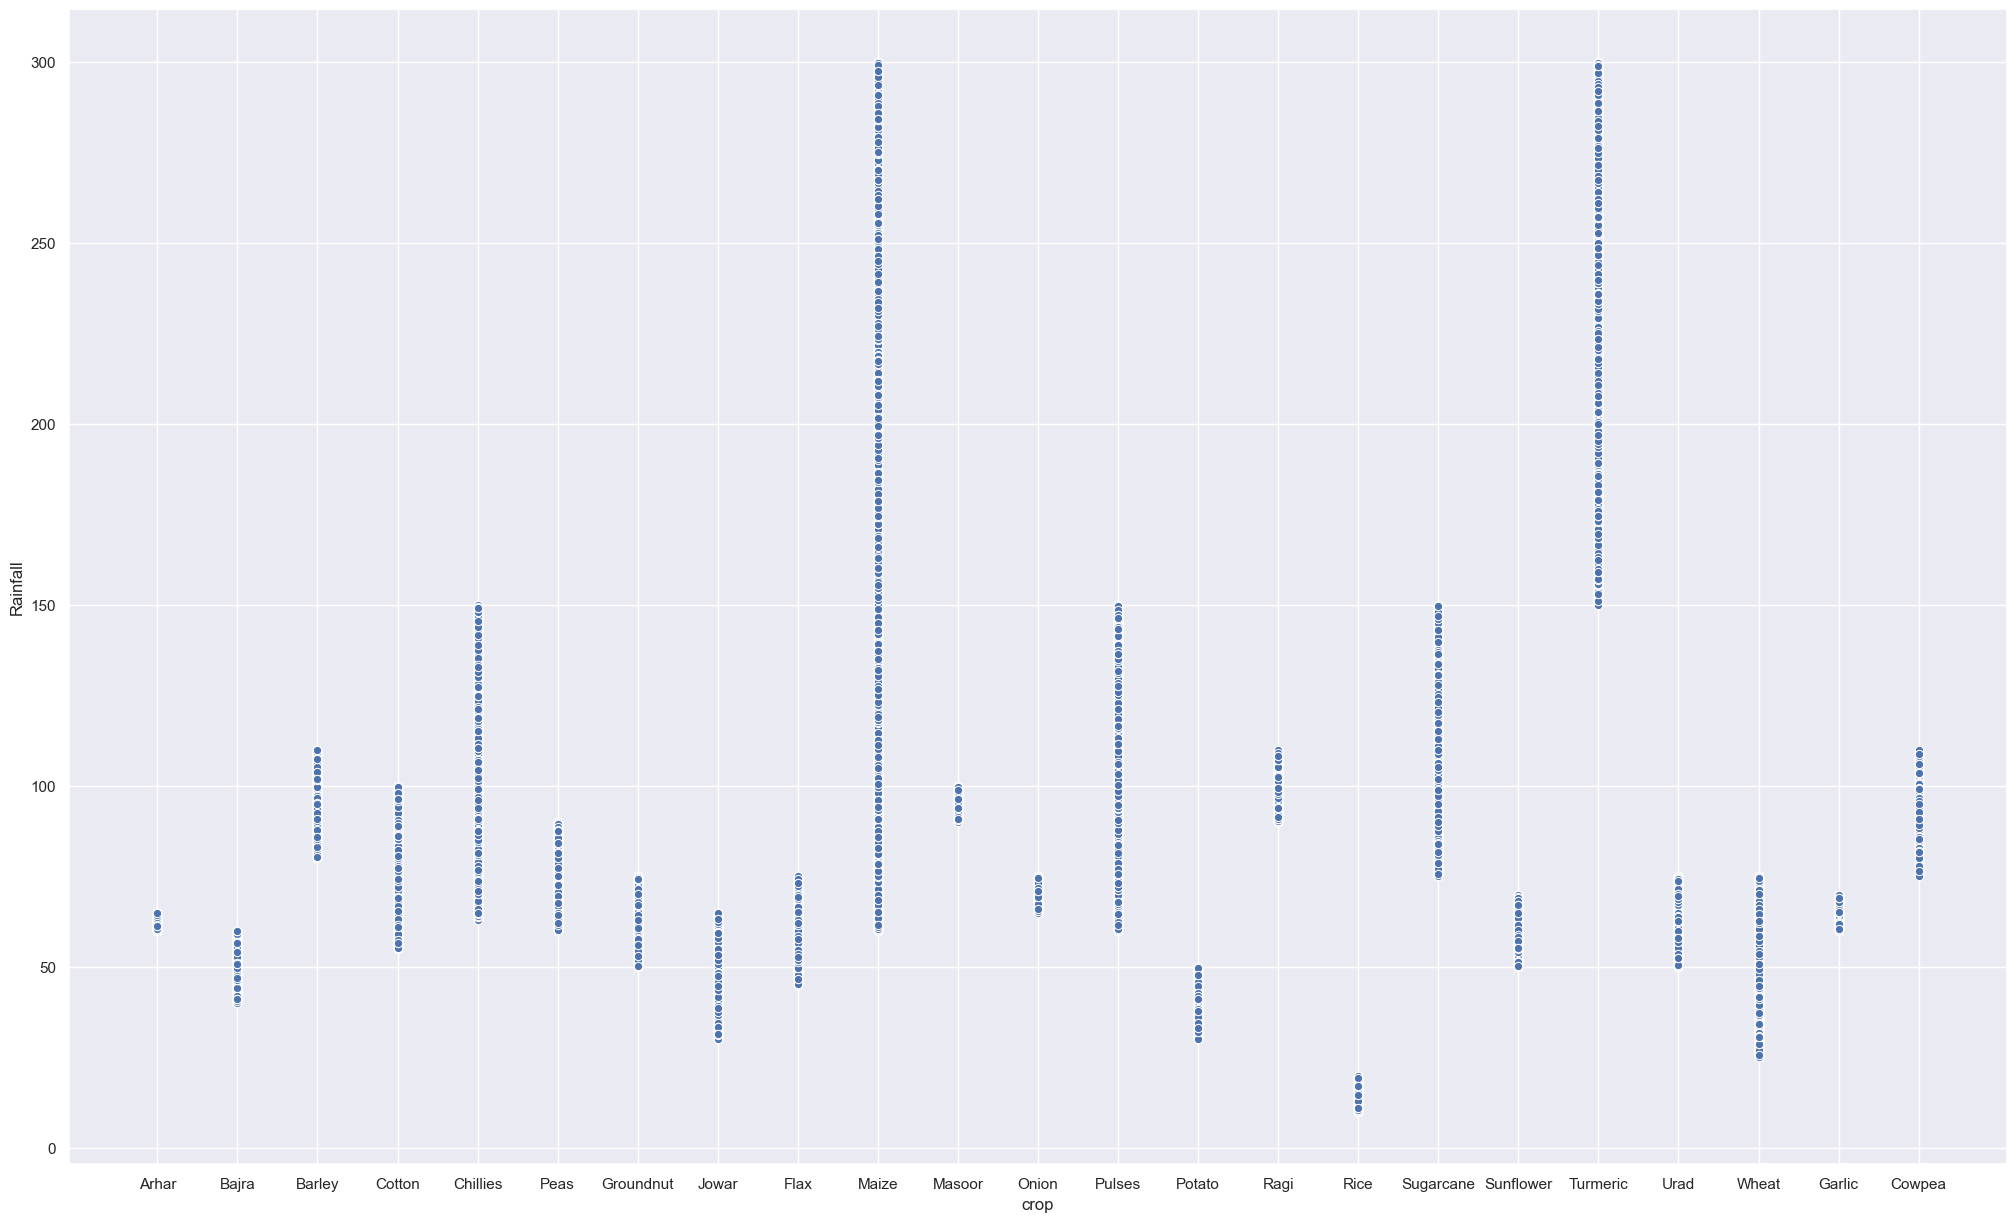

In [216]:
sns.set_context('talk')
sns.set(rc={'figure.figsize':(25,15)})
sns.scatterplot(x='crop', y='Rainfall', data=crop_data)

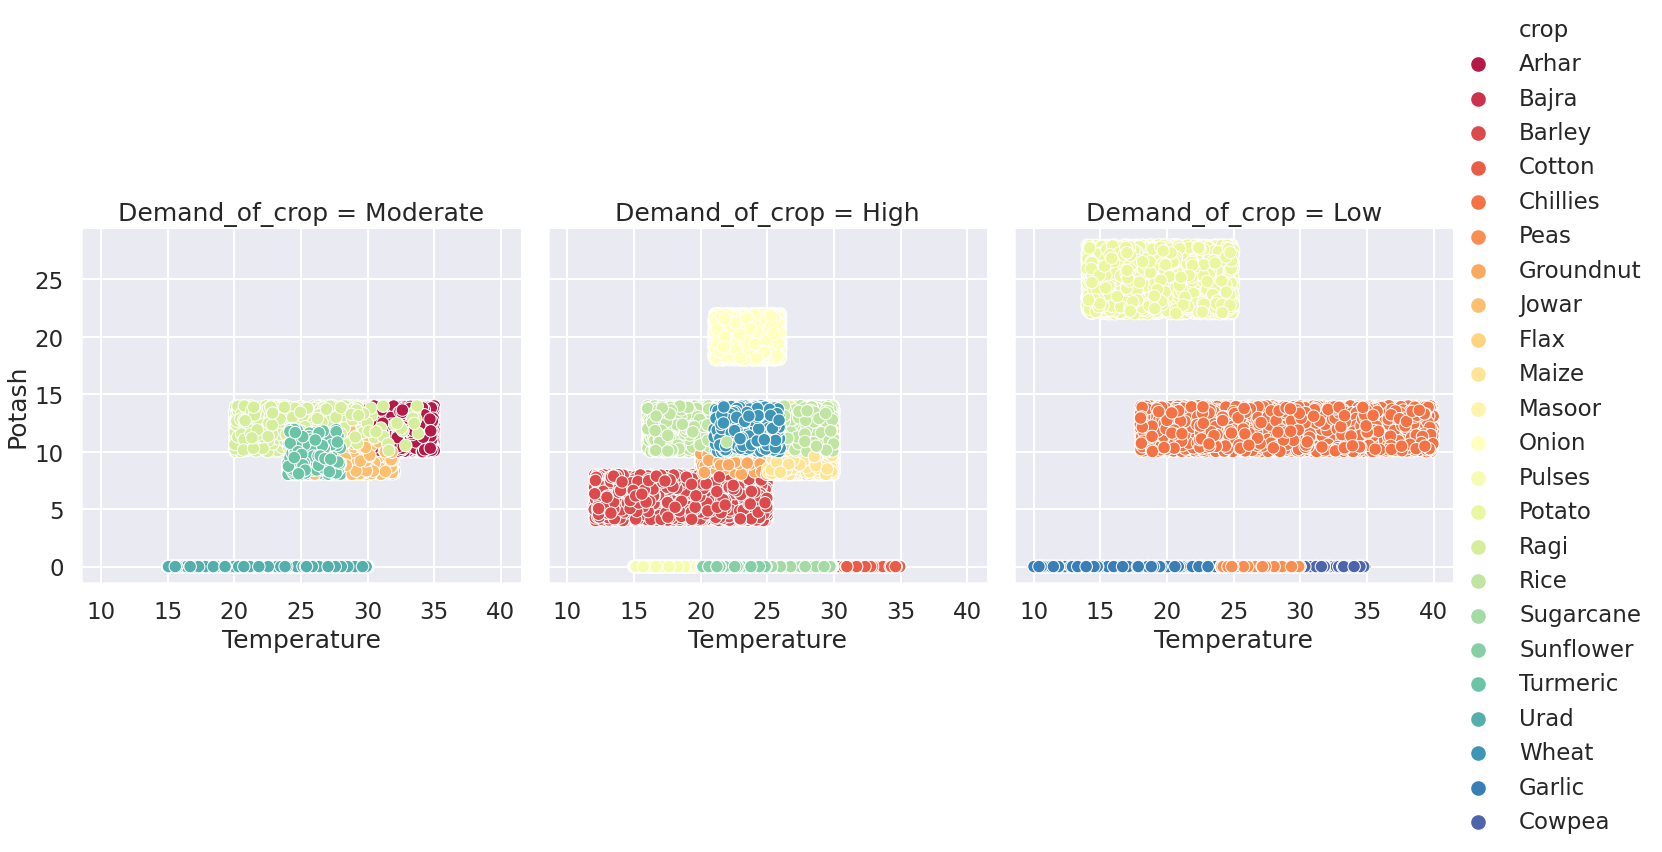

In [217]:
# Making the same scatterplot in a more interactive way using set_context
sns.set_style("darkgrid")
#sns.axes_style('white')
sns.set_context("talk")
sns.relplot(data = crop_data, x = 'Temperature', y = 'Potash', hue = 'crop', col = 'Demand_of_crop',palette= 'Spectral')
sns.reset_defaults()

In [218]:
# Label encoding the values 

from sklearn.preprocessing import LabelEncoder
crop_data_test = crop_data[['crop','Fertilisers_required','Crops_for_mixed_cropping','Demand_of_crop']]
lb=LabelEncoder()
for i in crop_data_test.columns:
    crop_data[i]=lb.fit_transform(crop_data_test[i])

<ipython-input-218-18904356917a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data[i]=lb.fit_transform(crop_data_test[i])


In [219]:
crop_data

Temperature        PH   Rainfall  Phosphorous   Nitrogen     Potash  \
0         33.259371  7.030931  60.840858    15.602418   6.722272  10.120769   
1         33.324233  6.562556  64.758946    16.013498   6.084758  11.472384   
2         33.736284  6.557421  61.573425    16.430769   5.703082  11.680659   
3         32.341533  6.821730  63.761790    15.978828   6.178624  10.308787   
4         32.777780  7.151006  61.350980    17.742642   7.166940  11.256358   
...             ...       ...        ...          ...        ...        ...   
121076    15.566117  7.693354  58.073681     4.564863   8.180757   0.000000   
121077    25.391389  6.101766  62.610572    49.117328  22.066996  12.035480   
121078    25.881600  6.181125  30.692217    53.876553  23.047927  12.743419   
121079    24.774702  6.929148  58.606499    47.295222  24.395453  11.042995   
121080    23.613468  6.643719  53.631079    54.345860  26.842375  13.102743   

        crop  Fertilisers_required  Demand_of_crop  Crops_for_mixed_cropping  
0          0                     4               2                        17  
1          0                     4               2                        17  
2          0                     4               2                        17  
3          0                     4               2                        17  
4          0                     4               2                        17  
...      ...                   ...             ...                       ...  
121076    21                     2               2                        13  
121077    22                    11               0                         8  
121078    22                    11               0                         8  
121079    22                    11               0                         8  
121080    22                    11               0                         8  

[104319 rows x 10 columns]

In [220]:
# Scaling down the values to fit into the model

from sklearn.preprocessing import StandardScaler

num_cols = ['Temperature','PH','Rainfall','Phosphorous','Nitrogen','Potash']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(crop_data[[i]])
    
    # transform the training data column
    crop_data[i] = scale.transform(crop_data[[i]])
    

<ipython-input-220-db615b2095a8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data[i] = scale.transform(crop_data[[i]])
<ipython-input-220-db615b2095a8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data[i] = scale.transform(crop_data[[i]])
<ipython-input-220-db615b2095a8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [221]:
crop_data

Temperature        PH  Rainfall  Phosphorous  Nitrogen    Potash  \
0          1.897496  0.548365 -0.393259    -0.706460 -1.019467  0.411684   
1          1.911271 -0.093546 -0.306561    -0.689586 -1.074442  0.603587   
2          1.998781 -0.100583 -0.377049    -0.672457 -1.107356  0.633158   
3          1.702567  0.261653 -0.328626    -0.691009 -1.066348  0.438378   
4          1.795216  0.712928 -0.381971    -0.618607 -0.981121  0.572916   
...             ...       ...       ...          ...       ...       ...   
121076    -1.860158  1.456219 -0.454490    -1.159534 -0.893695 -1.025274   
121077     0.226511 -0.725061 -0.354099     0.669272  0.303775  0.683536   
121078     0.330621 -0.616299 -1.060376     0.864631  0.388365  0.784050   
121079     0.095541  0.408871 -0.442700     0.594478  0.504568  0.542622   
121080    -0.151080  0.017688 -0.552794     0.883895  0.715577  0.835067   

        crop  Fertilisers_required  Demand_of_crop  Crops_for_mixed_cropping  
0          0                     4               2                        17  
1          0                     4               2                        17  
2          0                     4               2                        17  
3          0                     4               2                        17  
4          0                     4               2                        17  
...      ...                   ...             ...                       ...  
121076    21                     2               2                        13  
121077    22                    11               0                         8  
121078    22                    11               0                         8  
121079    22                    11               0                         8  
121080    22                    11               0                         8  

[104319 rows x 10 columns]

In [222]:
# Defining the features and label seperately 
X = crop_data.drop(['crop','Crops_for_mixed_cropping','Fertilisers_required','Demand_of_crop'],axis='columns') # dropping the label 'class' 
y = crop_data['crop'] #saving 'class' only attribute
y1 = crop_data['Fertilisers_required']

#### The data is split in 80:20 train:test ratio for modelling

In [223]:
# Splitting the data for crop

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [224]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y1,test_size=0.2,random_state=5)

In [225]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

gnb=GaussianNB()
gnb.fit(X_train, y_train)
pred1 =gnb.predict(X_test)
A2 = round(accuracy_score(y_test, pred1, normalize = True)*100,2)
print("Naive-Bayes accuracy is",A2)

Naive-Bayes accuracy is 99.49


In [226]:
SVC=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
SVC.fit(X_train,y_train)
prediction2=SVC.predict(X_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,y_test)*100)

Accuracy for linear SVM is 98.03489263803681


In [227]:
Decision=DecisionTreeClassifier()
Decision.fit(X_train,y_train)
prediction4=Decision.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test)*100)

The accuracy of the Decision Tree is 99.5398773006135


In [228]:
Random=RandomForestClassifier(n_estimators=100)
Random.fit(X_train,y_train)
prediction5=Random.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction5,y_test)*100)

The accuracy of the Random Forests is 99.55425613496932


In [139]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

CV Mean       Std
Linear Svm     0.981614  0.000996
Decision Tree  0.995063  0.000623
Naive Bayes    0.993750  0.000650
Random Forest  0.995418  0.000745

### The models seems to be over-fitting, let's test the model with single sample data 

In [309]:
# Sample data for crop = Arhar
Sample_data = [10,10,10,10,10,10]

Sample_data = pd.DataFrame([Sample_data])

for i in Sample_data.columns:
    # transform the training data column
    Sample_data[i] = scale.transform(Sample_data[[i]])
Sample_data

0         1         2         3         4         5
0  0.394537  0.394537  0.394537  0.394537  0.394537  0.394537

In [310]:
crop = ['Arhar', 'Bajra', 'Barley', 'Coriander', 'Cotton', 'Chillies',
       'Peas', 'Groundnut', 'Jowar', 'Flax', 'Maize', 'Masoor',
       'Moong(green gram)', 'Onion', 'Pulses', 'Potato', 'Ragi',
       'Rapeseed &mustard', 'Rice', 'Safflower', 'Sugarcane', 'Sunflower',
       'Turmeric', 'Urad', 'Wheat', 'Garlic', 'Cowpea', 'Ginger']

In [311]:
print('Naive Bayes predicts crop to be', crop[int(gnb.predict(Sample_data))])
print('SVC predicts crop to be', crop[int(SVC.predict(Sample_data))])
print('Decision Tree predicts crop to be', crop[int(Decision.predict(Sample_data))])
print('Random Forest predicts crop to be', crop[int(Random.predict(Sample_data))])

Naive Bayes predicts crop to be Maize
SVC predicts crop to be Maize
Decision Tree predicts crop to be Moong(green gram)
Random Forest predicts crop to be Maize


In [283]:
LinearModel = LinearRegression()
LinearModel = LinearModel.fit(X_train,y_train)
LinearPred = LinearModel.predict(X_test)
r2_score = LinearModel.score(X_train,y_train)

print("R2 score is ",r2_score)

R2 score is  0.13111136957539726


In [302]:
print('Linear predicts crop to be', crop[int(LinearModel.predict(Sample_data))])

Linear predicts crop to be Pulses


In [305]:
import pickle
pickle.dump(scale, open('Scale.pkl','wb'))
pickle.dump(Decision, open('DecisionModel.pkl','wb'))

## The below dataset is for crop image disease classification

In [2]:
dir = 'F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage'

In [3]:
classes = ["Pepper__bell___Bacterial_spot",
            "Pepper__bell___healthy",
           "Potato___Early_blight",
           "Potato___healthy",
           "Potato___Late_blight",
           "Tomato_Bacterial_spot",
           "Tomato_Early_blight",
           "Tomato_Late_blight",
           "Tomato_Leaf_Mold",
           "Tomato_Septoria_leaf_spot",
           "Tomato_Spider_mites_Two_spotted_spider_mite",
           "Tomato__Target_Spot",
           "Tomato__Tomato_YellowLeaf__Curl_Virus",
           "Tomato__Tomato_mosaic_virus",
           "Tomato_healthy",
           "Rice_Bacterial_leaf_blight",
           "Rice_Brown_spot",
           "Rice_Leaf_smut"
          ]

In [4]:
labels = []
from os.path import join, getsize
for root, dirs, files in os.walk('F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage'):
    print(root, "consumes", end=" ")
    print(sum(getsize(join(root, name)) for name in files), end=" ")
    print("bytes in", len(files), "non-directory files")
    labels.append(root)
    

F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage consumes 0 bytes in 0 non-directory files
F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage\.git consumes 2635158 bytes in 6 non-directory files
F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage\.git\hooks consumes 20659 bytes in 12 non-directory files
F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage\.git\info consumes 240 bytes in 2 non-directory files
F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage\.git\objects consumes 0 bytes in 0 non-directory files
F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage\.git\objects\info consumes 54 bytes in 1 non-directory files
F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage\.git\objects\pack consumes 318687579 bytes in 2 non-directory files
F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage\.git\refs consumes 0 bytes in 0 non-directory files
F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage\.git\refs\heads consumes 0 bytes in 0 non-directory files
F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage\.git\refs\tags consumes 0 bytes in 0 no

In [5]:
file_count = sum(len(files) for _, _, files in os.walk('F:\AIMT\Sem 2\AML 2404 AI ML Lab\PlantVillage'))
print(file_count)

20782


In [32]:
for categories in classes:
    path = os.path.join(dir,categories)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img))
        #plt.imshow(img_array)
        #plt.show

In [33]:
img_array.shape

(291, 741, 3)

In [34]:
image_size = 200
img_array_resized = cv2.resize(img_array,(image_size,image_size))
plt.imshow(img_array_resized)

In [35]:
img_array_resized.dtype

dtype('uint8')

In [6]:
training_images = []
#label= []
image_size = 150
for categories in classes:
    label = classes.index(categories)
    path = os.path.join(dir,categories)
    for img in os.listdir(path):
        try:
            img_array= cv2.imread(os.path.join(path,img))
            img_array_resized = cv2.resize(img_array,(image_size,image_size))
            training_images.append([img_array_resized,label])
        except Exception as e:
            pass
        

In [7]:
import random 
random.shuffle(training_images)

In [8]:
X= []
y= []
for features,label in training_images:
    X.append(features)
    y.append(label)
    

In [9]:
x2 = np.array(X).reshape(-1,image_size,image_size,3)
y2 = np.array(y)

In [101]:
#import pickle

#pickle_out = open("X.pickle","wb")
#pickle.dump(X, pickle_out)
#pickle_out.close()

#pickle_out = open("y.pickle","wb")
#pickle.dump(y, pickle_out)
#pickle_out.close()

In [1]:
#a = pickle.load(open("x1.pickle","rb"))
#b = pickle.load(open("y1.pickle","rb"))

In [10]:

x2 = x2/255.0

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [12]:
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape = x2.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

#model.fit(x1,chunks_labels[1], batch_size = 32, validation_split = 0.1)

In [13]:
model.fit(x2,y2, batch_size = 32, validation_split = 0.1)

584/584 [==============================] - 1548s 3s/step - loss: 9.2663e-07 - accuracy: 0.0476 - val_loss: 9.1951e-07 - val_accuracy: 0.0520


In [15]:
from tensorflow.keras.models import load_model

model.save('CNNmodel.h5')

In [12]:
model.save('CNNModel1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: CNNModel1\assets


In [51]:
pred = model.predict(b1)

In [49]:
a = cv2.imread("Test_Image.jpg")  # read in the image, convert to grayscale
A1 = cv2.resize(a, (image_size, image_size))
b1 = np.array(A1.reshape(-1,image_size,image_size,3))


In [52]:
print(classes[int(pred[0][0])])

Pepper__bell___Bacterial_spot


In [55]:
a1 = cv2.imread("Image_test2.jpg")  # read in the image, convert to grayscale
A11 = cv2.resize(a, (image_size, image_size))
b11 = np.array(A1.reshape(-1,image_size,image_size,3))


In [99]:
pred = model.predict(b11)
print(classes[int(pred[0][0])])

Pepper__bell___Bacterial_spot


In [81]:
a2 = cv2.imread("Img3.jpg")  # read in the image, convert to grayscale
A12 = cv2.resize(a, (image_size, image_size))
b12 = np.array(A1.reshape(-1,image_size,image_size,3))


In [100]:
pred = model.predict(b12)
print(classes[int(pred[0][0])])

Pepper__bell___Bacterial_spot


In [94]:
len(x1)

0

In [111]:
x1

[]